# Imports & setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import geopandas as gpd
import geoplot as gplt
import sddk
import warnings
warnings.simplefilter(action='ignore')# , category=FutureWarning)
from numpy import int64

In [2]:
# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"

In [3]:
s = sddk.cloudSession("sciencedata.dk", "SDAM_root", "648597@au.dk")

connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


# Import datasets

In [47]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")

In [2]:
# import the datasets...
PHI = pd.read_json("../data/large_data/PHI_v1.0.json")
iphi = pd.read_json("../data/large_data/iphi.json")

In [3]:
PHI = PHI.merge(iphi.rename(columns={"id":"PHI_ID"}), on="PHI_ID", how="outer")

# Merge with TM TextRelation data (i.e. IDs from various projects...)

In [40]:
# trismegistos text relations dataset
PHI_TM_merged = s.read_file("SDAM_data/PHI/PHI_TM_merged.csv")

In [41]:
to_keep = []
for col in PHI_TM_merged.columns:
    length_vals = len([el for el in PHI_TM_merged[col] if "[" in str(el)])
    if length_vals >= 1000:
        to_keep.append(col)
        print(col, length_vals)

TM_ID 218104
EDH 8472
EDCS 23929
EDR 3761
PHI 217863
LUPA 1129
ISic 2465
IG 8147
atticinscriptions 4156
Attalus 2235


In [42]:
PHI_TM_merged = PHI_TM_merged[to_keep]
PHI_TM_merged.head(10)

,TM_ID,EDH,EDCS,EDR,PHI,LUPA,ISic,IG,atticinscriptions,Attalus
0,['786251'],NaN,NaN,NaN,['1'],NaN,NaN,['IG I³ 1'],['1672'],NaN
1,['786252'],NaN,NaN,NaN,['2'],NaN,NaN,['IG I³ 2'],['1707'],NaN
2,['786253'],NaN,NaN,NaN,['3'],NaN,NaN,['IG I³ 3'],['ii-1b'],NaN
3,['786254'],NaN,NaN,NaN,['4'],NaN,NaN,"['IG I³ 4(A)', 'IG I³ 4(B)']",['1692'],NaN
4,['786255'],NaN,NaN,NaN,['5'],NaN,NaN,['IG I³ 5'],['1284'],NaN
5,['786256'],NaN,NaN,NaN,['6'],NaN,NaN,['IG I³ 6'],['6'],NaN
6,['786257'],NaN,NaN,NaN,['7'],NaN,NaN,['IG I³ 7'],['108'],NaN
7,['786258'],NaN,NaN,NaN,['8'],NaN,NaN,['IG I³ 8'],['8'],NaN
8,['786259'],NaN,NaN,NaN,['9'],NaN,NaN,['IG I³ 9'],['9'],NaN
9,['786260'],NaN,NaN,NaN,['10'],NaN,NaN,['IG I³ 10'],['120'],NaN


In [43]:
def try_eval(val):
  if not isinstance(val, list):
    try:
      val = eval(val)
    except:
      val = None
  return val

In [44]:
for col in PHI_TM_merged.columns:
    PHI_TM_merged[col] = PHI_TM_merged[col].apply(try_eval)

In [45]:
for col in PHI_TM_merged.columns:
    if "ID" not in col:
        PHI_TM_merged.rename(columns={col : col + "_ID"}, inplace=True)

In [54]:
def get_first_id(val):
    try:
        return int64(val[0])
    except:
        return val

PHI_TM_merged["PHI_ID"] = PHI_TM_merged["PHI_ID"].apply(get_first_id)

In [55]:
PHI_TM_merged.head(5)

,TM_ID,EDH_ID,EDCS_ID,EDR_ID,PHI_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID
0,[786251],None,None,None,1.0,None,None,[IG I³ 1],[1672],None
1,[786252],None,None,None,2.0,None,None,[IG I³ 2],[1707],None
2,[786253],None,None,None,3.0,None,None,[IG I³ 3],[ii-1b],None
3,[786254],None,None,None,4.0,None,None,"[IG I³ 4(A), IG I³ 4(B)]",[1692],None
4,[786255],None,None,None,5.0,None,None,[IG I³ 5],[1284],None


In [56]:
PHI = PHI.merge(PHI_TM_merged, on="PHI_ID")

In [57]:
PHI.head(5)

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata_x,data,...,date_circa,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID
0,/text/1?location=1701&patt=&bookid=4&offset=0&...,IG I³,1,Regions\nAttica (IG I-III),IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,,12.0,1\n\n\n\n5\n\n\n\n\n10\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,...,0.0,[786251],None,None,None,None,None,[IG I³ 1],[1672],None
1,/text/2?location=1701&patt=&bookid=4&offset=0&...,IG I³,2,Regions\nAttica (IG I-III),IG I³\n2,Att. — non-stoich. — c. 500 a.,,14.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,...,0.0,[786252],None,None,None,None,None,[IG I³ 2],[1707],None
2,/text/3?location=1701&patt=&bookid=4&offset=0&...,IG I³,3,Regions\nAttica (IG I-III),IG I³\n3,Att. — stoich. 21 — 490-480 a.,,13.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,...,0.0,[786253],None,None,None,None,None,[IG I³ 3],[ii-1b],None
3,/text/4?location=1701&patt=&bookid=4&offset=0&...,IG I³,4,Regions\nAttica (IG I-III),IG I³\n4,Att. — stoich. 38 — 485/4 a.,,56.0,face A.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n15\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,...,0.0,[786254],None,None,None,None,None,"[IG I³ 4(A), IG I³ 4(B)]",[1692],None
4,/text/5?location=1701&patt=&bookid=4&offset=0&...,IG I³,5,Regions\nAttica (IG I-III),IG I³\n5,Att. — c. 500 a.,,6.0,1\n\n\n\n5\n,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,...,0.0,[786255],None,None,None,None,None,[IG I³ 5],[1284],None


# Map TMgeo IDs on PHI using TM IDs

In [59]:
TM_TMgeo_dict = s.read_file("SDAM_data/PHI/TM_TMgeo_dict.json", "dict")

In [60]:
PHI["TMgeo_ID"] = PHI["TM_ID"].apply(lambda x: TM_TMgeo_dict[str(x[0])])

In [61]:
PHI.head(5)

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata_x,data,filename,PHI_ID,string_pythia,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,clean_text_pythia,sents,sents_N,lem_sents,lemmata,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,text,metadata_y,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID
0,/text/1?location=1701&patt=&bookid=4&offset=0&...,IG I³,1,Regions\nAttica (IG I-III),IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,,12.0,1\n\n\n\n5\n\n\n\n\n10\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,IG-I³.csv,1,ἔδοχσεν τοι δέμοι τ[ὸς ἐ σ]αλαμ[ῖνι κλερόχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκε...,[ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκ...,1.0,"[[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σα...","[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σαλ...",c. 510-500 a.,"{'or': None, 'not_before': -511, 'not_after': ...",-511.0,-499.0,None,"[range, phase, ca]",None,None,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,1701.0,Attica (IG I-III),1700.0,Attica,c. 510-500 a.,-510.0,-500.0,0.0,[786251],None,None,None,None,None,[IG I³ 1],[1672],None,[364]
1,/text/2?location=1701&patt=&bookid=4&offset=0&...,IG I³,2,Regions\nAttica (IG I-III),IG I³\n2,Att. — non-stoich. — c. 500 a.,,14.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,IG-I³.csv,2,[--------9---]ν βολ ---------- [------7--] α ἑ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"ν βολ ․ α ⋮ ℎεκον σιον, γνοσθε͂ι δὲ ν ἀτεχνος ...",ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄλ...,[ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄ...,1.0,"[[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελ...","[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελε...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,[--------]ν βολ ---------- [------] α εκον ---...,Att. — non-stoich. — c. 500 a.,1701.0,Attica (IG I-III),1700.0,Attica,c. 500 a.,-500.0,-500.0,0.0,[786252],None,None,None,None,None,[IG I³ 2],[1707],None,[373]
2,/text/3?location=1701&patt=&bookid=4&offset=0&...,IG I³,3,Regions\nAttica (IG I-III),IG I³\n3,Att. — stoich. 21 — 490-480 a.,,13.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,IG-I³.csv,3,[-]αρ[----]ι ἑρακλειο[-----] [-]αρο [-] τιθένα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,[αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκ...,1.0,"[[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγο...","[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγον...",490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,Att. — stoich. 21 — 490-480 a.,1701.0,Attica (IG I-III),1700.0,Attica,490-480 a.,-490.0,-480.0,0.0,[786253],None,None,None,None,None,[IG I³ 3],[ii-1b],None,[373]
3,/text/4?location=1701&patt=&bookid=4&offset=0&...,IG I³,4,Regions\nAttica (IG I-III),IG I³\n4,Att. — stoich. 38 — 485/4 a.,,56.0,face A.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n15\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,IG-I³.csv,4,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,ἐὰν δέ τις αν ⋮ ἒ φρορὰν ⋮ μὲ πεντέκοντα ⋮ δρα...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,[ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς ...,2.0,"[[τὶς, φρορὰν, πεντέκοντα, δραχμή, τ, πρᾶχσιν,...","[τὶς,

In [67]:
# how many unique places we have in PHI?
len(PHI["TMgeo_ID"].apply(lambda x: x[0]).unique())

9163

# Load dump of Trismegistos places

In [68]:
export_geo = pd.read_csv("../data/large_data/export_geo.csv")
export_geo.head(10)

,id,country,name_standard,begin_date,end_date,coordinates;
0,1,ghost name,A[..]....,0,0,;
1,2,Egypt,A.[ ],-228,-227,;
2,3,Egypt,A.[ ],164,164,;
3,4,Egypt,Aalabin Topos,700,725,;
4,5,Egypt,Aanemooch Topos,700,725,;
5,6,Egypt,Ab[ ] Epoikion,130,160,;
6,7,Egypt,Ab( ) Chorion,600,799,;
7,8,ghost name,Abak( ),0,0,;
8,9,Egypt,Abaktou Topos,524,725,;
9,10,Sudan,Abale,77,77,"17.682319,33.975361;"


In [69]:
len(export_geo)

60677

In [70]:
export_geo = export_geo[export_geo["coordinates;"].str.contains(",")].copy()
export_geo.head(5)

,id,country,name_standard,begin_date,end_date,coordinates;
9,10,Sudan,Abale,77,77,"17.682319,33.975361;"
12,13,Egypt,Abaton,-399,499,"24.041393,32.897895;"
13,14,Greece,Abdera,900,999,"40.95,24.983333;"
30,31,Egypt,Abu el-Matamir,0,0,"30.908411,30.148487;"
32,33,Egypt,Amouda,77,77,"22.33644375,31.62656425;"


In [71]:
export_geo["y_lat"] = export_geo["coordinates;"].apply(lambda x: float(x.partition(",")[0].replace(";","")))
export_geo["x_long"] = export_geo["coordinates;"].apply(lambda x: float(x.partition(",")[2].replace(";","")))


In [72]:
TM_geo = gpd.GeoDataFrame(export_geo, geometry=gpd.points_from_xy(export_geo["x_long"], export_geo["y_lat"]))

In [73]:
#TM_geo = gpd.read_file("../data/large_data/TM_geo.json", driver="GeoJSON")
TM_geo.head(5)

,id,country,name_standard,begin_date,end_date,coordinates;,y_lat,x_long,geometry
9,10,Sudan,Abale,77,77,"17.682319,33.975361;",17.682319,33.975361,POINT (33.97536 17.68232)
12,13,Egypt,Abaton,-399,499,"24.041393,32.897895;",24.041393,32.897895,POINT (32.89789 24.04139)
13,14,Greece,Abdera,900,999,"40.95,24.983333;",40.950000,24.983333,POINT (24.98333 40.95000)
30,31,Egypt,Abu el-Matamir,0,0,"30.908411,30.148487;",30.908411,30.148487,POINT (30.14849 30.90841)
32,33,Egypt,Amouda,77,77,"22.33644375,31.62656425;",22.336444,31.626564,POINT (31.62656 22.33644)


<AxesSubplot:>

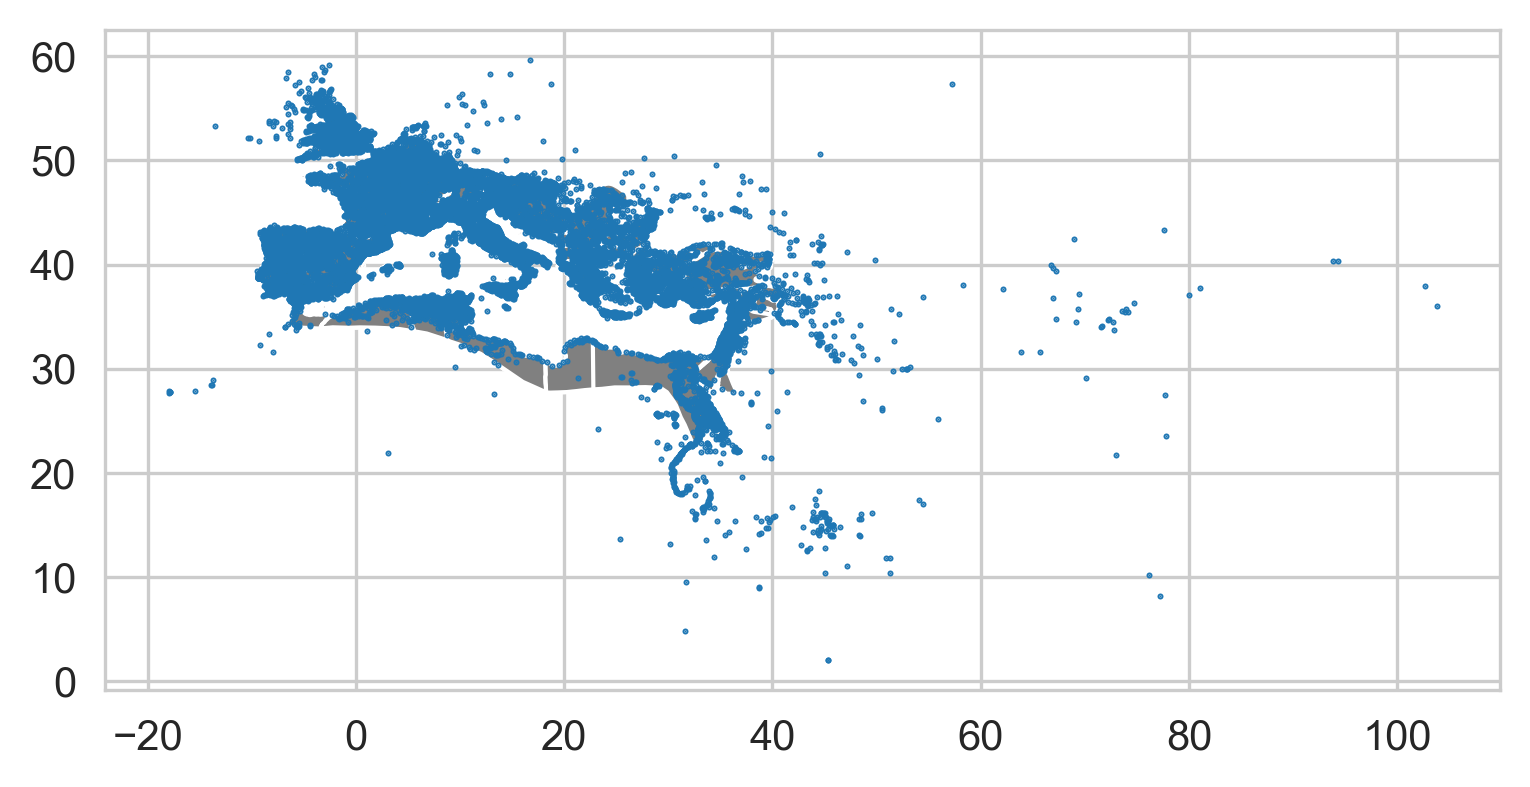

In [74]:
fig, ax = plt.subplots(dpi=300)
pleiades_regions.plot(ax=ax, color="grey")
TM_geo.plot(ax=ax, markersize=0.2)

In [81]:
dict_xlong = dict(zip(export_geo["id"].astype(str), export_geo["x_long"]))
dict_ylat = dict(zip(export_geo["id"].astype(str), export_geo["y_lat"]))
dict_name = dict(zip(export_geo["id"].astype(str), export_geo["name_standard"]))

In [83]:
def geocode(tmgeoid_list, datadict):
    id = str(tmgeoid_list[0])
    val = None
    if id in datadict.keys():
        val = datadict[id]
    return val

In [84]:
PHI["x_long"] = PHI["TMgeo_ID"].apply(lambda x: geocode(x, dict_xlong))
PHI["y_lat"] = PHI["TMgeo_ID"].apply(lambda x: geocode(x, dict_ylat))
PHI["TMgeo_name"] = PHI["TMgeo_ID"].apply(lambda x: geocode(x, dict_name))

In [85]:
PHI.head(20)

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata_x,data,filename,PHI_ID,string_pythia,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,clean_text_pythia,sents,sents_N,lem_sents,lemmata,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,text,metadata_y,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name
0,/text/1?location=1701&patt=&bookid=4&offset=0&...,IG I³,1,Regions\nAttica (IG I-III),IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,,12.0,1\n\n\n\n5\n\n\n\n\n10\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,IG-I³.csv,1,ἔδοχσεν τοι δέμοι τ[ὸς ἐ σ]αλαμ[ῖνι κλερόχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκε...,[ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκ...,1.0,"[[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σα...","[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σαλ...",c. 510-500 a.,"{'or': None, 'not_before': -511, 'not_after': ...",-511.0,-499.0,None,"[range, phase, ca]",None,None,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,1701.0,Attica (IG I-III),1700.0,Attica,c. 510-500 a.,-510.0,-500.0,0.0,[786251],None,None,None,None,None,[IG I³ 1],[1672],None,[364],23.723985,37.972747,Athenai
1,/text/2?location=1701&patt=&bookid=4&offset=0&...,IG I³,2,Regions\nAttica (IG I-III),IG I³\n2,Att. — non-stoich. — c. 500 a.,,14.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,IG-I³.csv,2,[--------9---]ν βολ ---------- [------7--] α ἑ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"ν βολ ․ α ⋮ ℎεκον σιον, γνοσθε͂ι δὲ ν ἀτεχνος ...",ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄλ...,[ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄ...,1.0,"[[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελ...","[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελε...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,[--------]ν βολ ---------- [------] α εκον ---...,Att. — non-stoich. — c. 500 a.,1701.0,Attica (IG I-III),1700.0,Attica,c. 500 a.,-500.0,-500.0,0.0,[786252],None,None,None,None,None,[IG I³ 2],[1707],None,[373],NaN,NaN,None
2,/text/3?location=1701&patt=&bookid=4&offset=0&...,IG I³,3,Regions\nAttica (IG I-III),IG I³\n3,Att. — stoich. 21 — 490-480 a.,,13.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,IG-I³.csv,3,[-]αρ[----]ι ἑρακλειο[-----] [-]αρο [-] τιθένα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,[αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκ...,1.0,"[[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγο...","[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγον...",490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,Att. — stoich. 21 — 490-480 a.,1701.0,Attica (IG I-III),1700.0,Attica,490-480 a.,-490.0,-480.0,0.0,[786253],None,None,None,None,None,[IG I³ 3],[ii-1b],None,[373],NaN,NaN,None
3,/text/4?location=1701&patt=&bookid=4&offset=0&...,IG I³,4,Regions\nAttica (IG I-III),IG I³\n4,Att. — stoich. 38 — 485/4 a.,,56.0,face A.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n15\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,IG-I³.csv,4,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,ἐὰν δέ τις αν ⋮ ἒ φρορὰν ⋮ μὲ πεντέκοντα ⋮ δρα...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,[ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκο

In [88]:
len(PHI)

217863

In [87]:
len(PHI[PHI["x_long"].notnull()])

180061

In [90]:
PHI = gpd.GeoDataFrame(PHI, geometry=gpd.points_from_xy(PHI["x_long"], PHI["y_lat"]))

In [95]:
pleiades_regions_merged = gpd.GeoSeries(pleiades_regions.unary_union)

(22.0, 55.5)

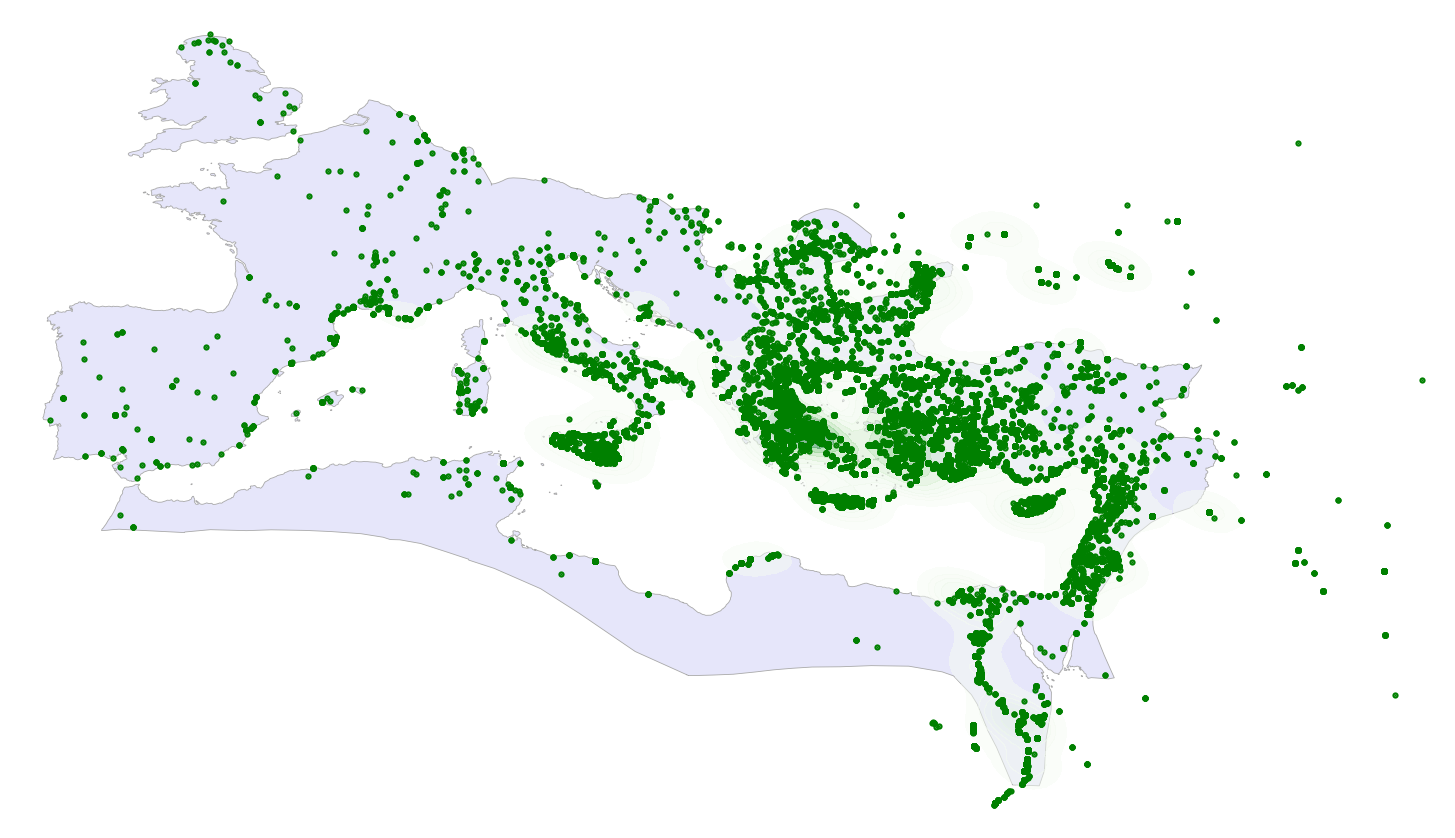

In [99]:
fig, ax = plt.subplots()
pleiades_regions_merged.plot(ax=ax, edgecolor="darkgrey" , linewidth=0.2, color="lavender")
gplt.kdeplot(PHI[PHI["x_long"].notnull()], cmap=plt.get_cmap("Greens"), ax=ax, alpha=0.5, shade=True, zorder=2)
PHI.plot(ax=ax, marker=".", markersize=1, color="green", zorder=3)
ax.set_axis_off()
ax.set_xlim(-10, 50)
ax.set_ylim(22, 55.5)
#ax.set_title("PHI" + " (N={0})".format(str(len(subset))))

In [100]:
LIRE = gpd.read_file("/Users/kasev//Projects/LIRE_ETL/data/large_data/LIRE_v1-2.geojson", driver="GeoJSON")

(22.0, 55.5)

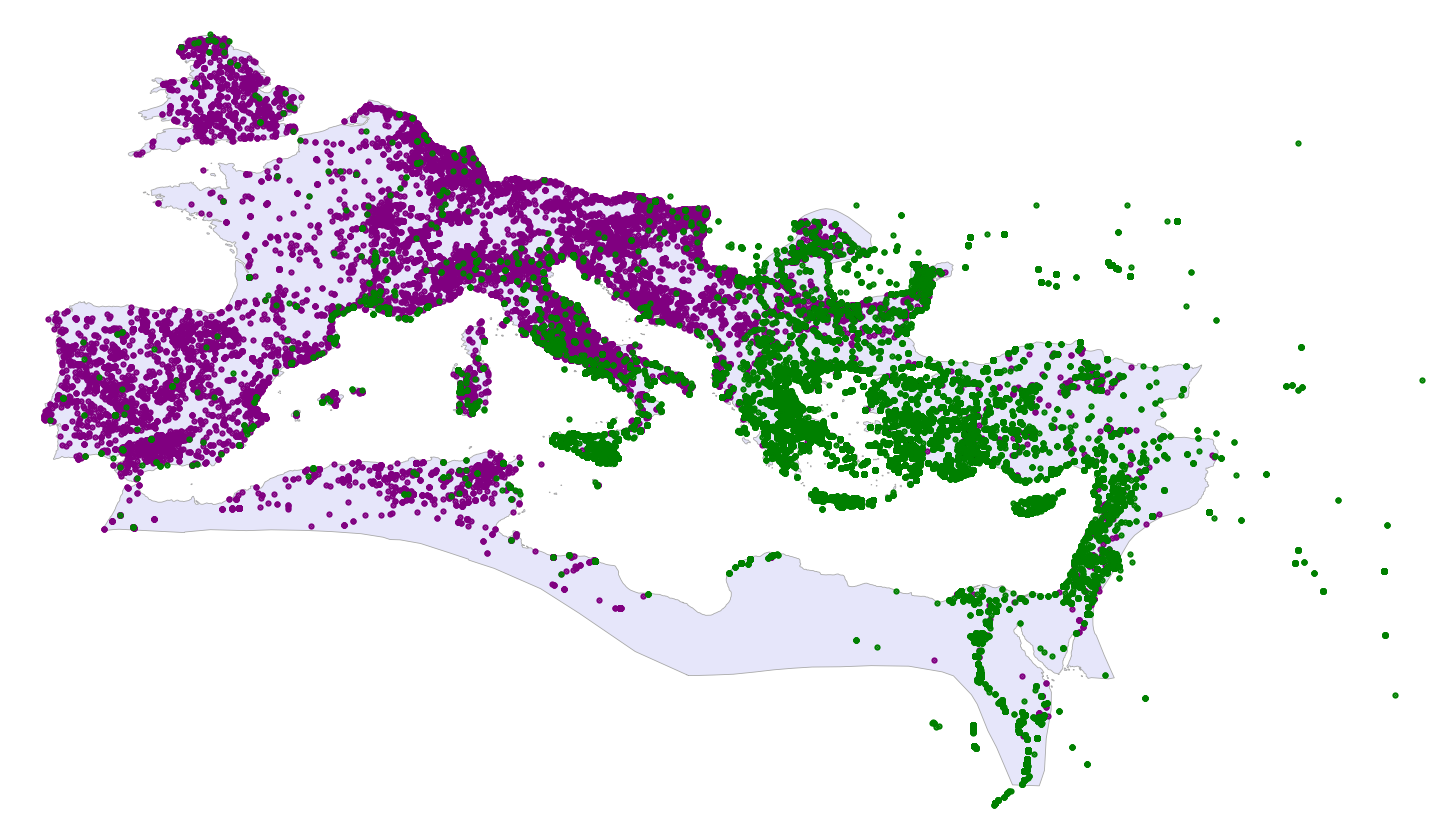

In [102]:
fig, ax = plt.subplots()
pleiades_regions_merged.plot(ax=ax, edgecolor="darkgrey" , linewidth=0.2, color="lavender")
#gplt.kdeplot(PHI[PHI["x_long"].notnull()], cmap=plt.get_cmap("Greens"), ax=ax, alpha=0.5, shade=True, zorder=2)
LIRE.plot(ax=ax, marker=".", markersize=1, color="purple", zorder=3)
PHI.plot(ax=ax, marker=".", markersize=1, color="green", zorder=3)
ax.set_axis_off()
ax.set_xlim(-10, 50)
ax.set_ylim(22, 55.5)
#ax.set_title(title + " (N={0})".format(str(len(subset))))

In [110]:
PHI.head(10)

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata_x,data,filename,PHI_ID,string_pythia,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,clean_text_pythia,sents,sents_N,lem_sents,lemmata,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,text,metadata_y,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry
0,/text/1?location=1701&patt=&bookid=4&offset=0&...,IG I³,1,Regions\nAttica (IG I-III),IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,,12.0,1\n\n\n\n5\n\n\n\n\n10\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,IG-I³.csv,1,ἔδοχσεν τοι δέμοι τ[ὸς ἐ σ]αλαμ[ῖνι κλερόχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκε...,[ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκ...,1.0,"[[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σα...","[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σαλ...",c. 510-500 a.,"{'or': None, 'not_before': -511, 'not_after': ...",-511.0,-499.0,None,"[range, phase, ca]",None,None,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,1701.0,Attica (IG I-III),1700.0,Attica,c. 510-500 a.,-510.0,-500.0,0.0,[786251],None,None,None,None,None,[IG I³ 1],[1672],None,[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
1,/text/2?location=1701&patt=&bookid=4&offset=0&...,IG I³,2,Regions\nAttica (IG I-III),IG I³\n2,Att. — non-stoich. — c. 500 a.,,14.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,IG-I³.csv,2,[--------9---]ν βολ ---------- [------7--] α ἑ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"ν βολ ․ α ⋮ ℎεκον σιον, γνοσθε͂ι δὲ ν ἀτεχνος ...",ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄλ...,[ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄ...,1.0,"[[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελ...","[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελε...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,[--------]ν βολ ---------- [------] α εκον ---...,Att. — non-stoich. — c. 500 a.,1701.0,Attica (IG I-III),1700.0,Attica,c. 500 a.,-500.0,-500.0,0.0,[786252],None,None,None,None,None,[IG I³ 2],[1707],None,[373],NaN,NaN,None,POINT EMPTY
2,/text/3?location=1701&patt=&bookid=4&offset=0&...,IG I³,3,Regions\nAttica (IG I-III),IG I³\n3,Att. — stoich. 21 — 490-480 a.,,13.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,IG-I³.csv,3,[-]αρ[----]ι ἑρακλειο[-----] [-]αρο [-] τιθένα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,[αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκ...,1.0,"[[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγο...","[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγον...",490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,Att. — stoich. 21 — 490-480 a.,1701.0,Attica (IG I-III),1700.0,Attica,490-480 a.,-490.0,-480.0,0.0,[786253],None,None,None,None,None,[IG I³ 3],[ii-1b],None,[373],NaN,NaN,None,POINT EMPTY
3,/text/4?location=1701&patt=&bookid=4&offset=0&...,IG I³,4,Regions\nAttica (IG I-III),IG I³\n4,Att. — stoich. 38 — 485/4 a.,,56.0,face A.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n15\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,IG-I³.csv,4,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,ἐὰν δέ τις αν ⋮ ἒ φρορὰν ⋮ μὲ πεντέκοντα ⋮ δρα...,ἐὰν δέ τις αν ἒ φρορὰν μὲ

In [111]:
PHI.columns

Index(['URL', 'Book', 'Text', 'hdr1', 'hdr2', 'tildeinfo', 'note', 'lines',
       'metadata_x', 'data', 'filename', 'PHI_ID', 'string_pythia',
       'clean_text_conservative', 'clean_text_interpretive_word',
       'clean_text_interpretive_sentence', 'clean_text_pythia', 'sents',
       'sents_N', 'lem_sents', 'lemmata', 'raw_date', 'dating_dict',
       'not_before', 'not_after', 'or', 'date_tags', 'certainty', 'link',
       'text', 'metadata_y', 'region_main_id', 'region_main', 'region_sub_id',
       'region_sub', 'date_str', 'date_min', 'date_max', 'date_circa', 'TM_ID',
       'EDH_ID', 'EDCS_ID', 'EDR_ID', 'LUPA_ID', 'ISic_ID', 'IG_ID',
       'atticinscriptions_ID', 'Attalus_ID', 'TMgeo_ID', 'x_long', 'y_lat',
       'TMgeo_name', 'geometry'],
      dtype='object')

In [116]:
PHI_filtered = PHI[['PHI_ID', 'metadata_y', 'data', 'text', 'clean_text_interpretive_word', 'lemmata', 'not_before', 'not_after', 'TM_ID', 'EDH_ID', 'EDCS_ID', 'EDR_ID', 'LUPA_ID', 'ISic_ID', 'IG_ID', 'atticinscriptions_ID', 'Attalus_ID', 'TMgeo_ID', 'x_long', 'y_lat', 'TMgeo_name', 'geometry']]

In [125]:
PHI_filtered = pd.DataFrame(PHI[['PHI_ID', 'metadata_y', 'data', 'text', 'clean_text_interpretive_word', 'lemmata', 'not_before', 'not_after', 'TM_ID', 'EDH_ID', 'EDCS_ID', 'EDR_ID', 'LUPA_ID', 'ISic_ID', 'IG_ID', 'atticinscriptions_ID', 'Attalus_ID', 'TMgeo_ID', 'x_long', 'y_lat', 'TMgeo_name']])

In [130]:
PHI_filtered.rename(columns={"metadata_y" : "metadata",
                             "data" : "text_raw",
                             "text" : "text_raw_iphi"}, inplace=True)

In [131]:
PHI_filtered.to_json("../data/large_data/PHIG.json")

In [132]:
s.write_file("SDAM_data/PHI/PHIG.json", PHI_filtered)

A file with the same name ("PHIG.json") already exists in this location.
Your <class 'pandas.core.frame.DataFrame'> object has been succesfully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/PHI/PHIG.json"
